In [2]:
# import libraries
import os
import requests
import pandas as pd
import numpy as np
from pandas import json_normalize 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# for metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score,confusion_matrix

# for plots 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot


# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# model save/load
import pickle

In [3]:
# get api key
api_key = os.environ['SPORTS_DATA_IO_API']

KeyError: 'SPORTS_DATA_IO_API'

In [4]:
# bring in all training data from csv
# dataframe to combine all dataframes (regular and post season)
seasons = [2017,2018,2019,2020]
all_data = pd.DataFrame()
for season in seasons:
    # append regular saeason data
    df_reg_season = pd.read_csv('./data/custom_games_by_season/{0}_data.csv'.format(season)) 
    df_reg_season = df_reg_season.drop(columns=['Week'])   
    all_data = all_data.append(df_reg_season, ignore_index = True) 
    
    # append post season data if not 2020
    if season != 2020:
        df_post_season = pd.read_csv('./data/custom_postseason_games_by_season/{0}_data.csv'.format(season)) 
        df_post_season = df_post_season.drop(columns=['Week'])   
        all_data = all_data.append(df_post_season, ignore_index = True) 
        
# remove null columns (no idea where they come from)
all_data

FileNotFoundError: [Errno 2] File ./data/custom_games_by_season/2017_data.csv does not exist: './data/custom_games_by_season/2017_data.csv'

Accuracy Score: 0.563158
Precision Score: 0.590909
Recall Score: 0.728972
0.6527196652719666

true-negative: 29 
false-positive: 54 
false-negative: 29 
true-positive: 78


c:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


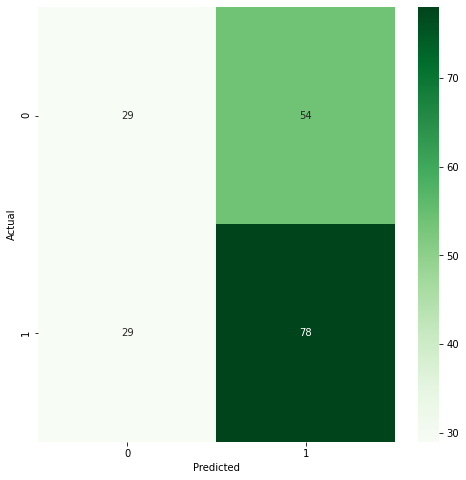

In [240]:
# model creation

# get desired data
selected_features = ['AwayAverage','AwayFirstDowns', 'AwayTime', 'AwayThirdDowns', 'HomeAverage','HomeFirstDowns', 'HomeTime', 'HomeThirdDowns']
target = ['HomeResult']

# create model
model = LogisticRegression()


# train model with all data available
X = all_data[selected_features].values
y = all_data[target].values

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# train the model with available data
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)
y_pred

# check model metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)


precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

print(f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('')
print('true-negative:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

plt.show()

# save the model
with open('../models/nfl_predictor_lr.pkl','wb') as f:
    pickle.dump(model,f)


<ipython-input-244-c0b5f0a5b635>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy Score: 0.610526
Precision Score: 0.636364
Recall Score: 0.719626
0.6754385964912281
true-negative: 39 
false-positive: 44 
false-negative: 30 
true-positive: 77


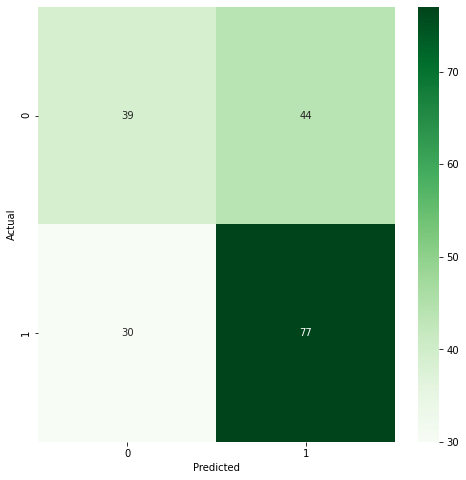

In [244]:
# try random forest
# model creation


# create model 
model = RandomForestClassifier()


# train the model with available data
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)
y_pred

# check model metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)


precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

print(f1_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negative:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

plt.show()

# save the model
with open('../models/nfl_predictor_rf.pkl','wb') as f:
    pickle.dump(model,f)


In [256]:
# get custom season data
df_custom_regular_season = pd.read_csv('./data/custom_season_team_data/2020_data.csv')
df_custom_regular_season = df_custom_regular_season.set_index('Team')
# get latest weeks games
response = requests.get('https://api.sportsdata.io/v3/nfl/scores/json/CurrentWeek?key=d8b5ea01537141eb9a320f95994b7109')
week = response.json()

# get season matchup with stats (should be updated)
df_games = pd.read_csv('./custom_games_by_season_with_stats/2020_data.csv')
df_games = df_games[df_games.Week == week]

df_games

,HomeTeam,AwayTeam,Week,AwayAverage,HomeAverage,AwayFirstDowns,HomeFirstDowns,AwayTime,HomeTime,AwayThirdDowns,HomeThirdDowns
161,DET,HOU,12,22.7,22.700000,19.700000,21.1,27.067000,27.588000,41.840000,38.720000
162,DAL,WAS,12,20.0,23.500000,20.800000,25.0,29.498000,28.184000,38.110000,41.820000
163,PIT,BAL,12,26.8,29.800000,19.800000,21.3,31.364000,31.995000,45.120000,44.610000
164,ATL,LV,12,28.6,25.200000,22.400000,23.2,31.703000,31.150000,51.220000,39.580000
165,BUF,LAC,12,26.0,27.200000,23.700000,23.8,32.650000,30.554000,46.170000,48.540000
166,CIN,NYG,12,19.5,21.300000,19.500000,22.7,28.975000,32.343000,40.670000,36.920000
167,IND,TEN,12,27.9,27.600000,23.200000,22.3,28.484000,31.511000,45.630000,37.020000
168,MIN,CAR,12,23.0,26.400000,21.454545,21.8,30.982727,28.477000,40.445455,43.010000
169,NE,ARI,12,28.7,20.900000,25.700000,23.2,28.807000,30.377000,43.640000,42.950000
170,NYJ,MIA,12,26.4,14.900000,20.200000,16.7,30.164000,26.272000,38.460000,32.900000


In [260]:
# import a model
with open('../models/nfl_predictor_rf.pkl', 'rb') as f:
    model = pickle.load(f)
values = df_games[selected_features].values

In [261]:
predictions = model.predict(values)

# Note: we are not accounting for draws, where both the values of homeresult = awayresult = 0

In [262]:
for index, row in games_this_week.iterrows():
    if predictions[index] == 1:
        print(row.HomeTeam)
    else:
        print(row.AwayTeam)

DET
WAS
PIT
LV
LAC
CIN
TEN
MIN
ARI
MIA
CLE
NO
LAR
KC
GB
SEA
